# Importing Libraries

In [5]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Loading dataset

In [6]:
boston = datasets.load_boston()
print(f"Type: {type(boston)}")
print(f"Keys: {boston.keys()}")

Type: <class 'sklearn.utils.Bunch'>
Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [7]:
X = boston.data
y = boston.target

# Some Visualizations

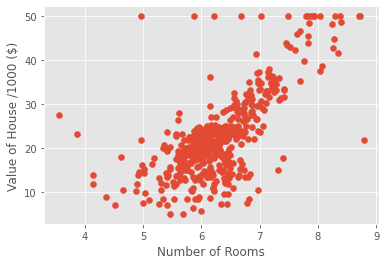

In [10]:
X_rooms = X[:,5]

y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

plt.scatter(X_rooms, y)
plt.ylabel('Value of House /1000 ($)')
plt.xlabel('Number of Rooms')
plt.show;

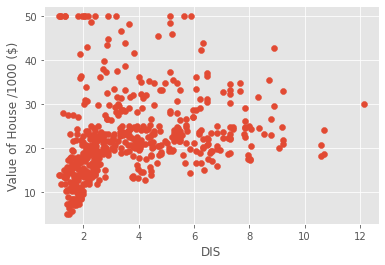

In [16]:
X_dis = X[:,7]

X_dis = X_dis.reshape(-1,1)

plt.scatter(X_dis, y)
plt.ylabel('Value of House /1000 ($)')
plt.xlabel('DIS')
plt.show;

### Building model for Rooms as predictor variable

In [22]:
df = pd.DataFrame(X, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
from sklearn.tree import DecisionTreeRegressor

X = df[['RM']] 
y = pd.Series(boston.target)

dtr1 = DecisionTreeRegressor(max_depth=2,
                             random_state=1)

dtr1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=1)

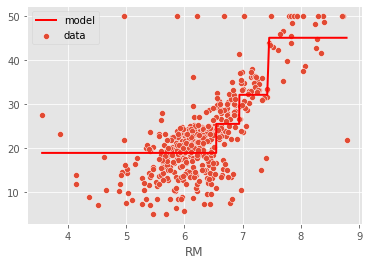

In [31]:
# Visualize the Tree

sns.scatterplot(x=df['RM'],
                y=y,
                label='data')

plt.plot(df['RM'].sort_values(),       
         dtr1.predict(df['RM'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)

plt.legend()


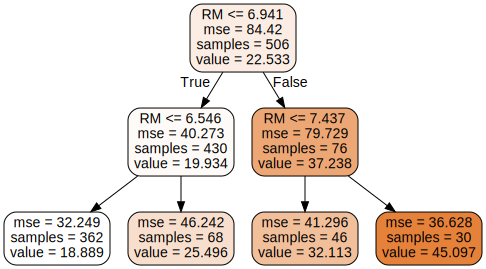

In [36]:
# Visualizing Decision Tree using GraphViz

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtr1, feature_names=['RM'],  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data)
graph.render("tree") 
graph

# Building Model using all Variables

In [37]:
from sklearn.model_selection import train_test_split

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42,
                                                    shuffle=True)

## Using k-fold cross validation for getting best values of hyperparameters: max_depth and min_samples_split

In [39]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 21),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 10, 'min_samples_split': 30}
24.31824424489846


Using above values for building Decision Tree.

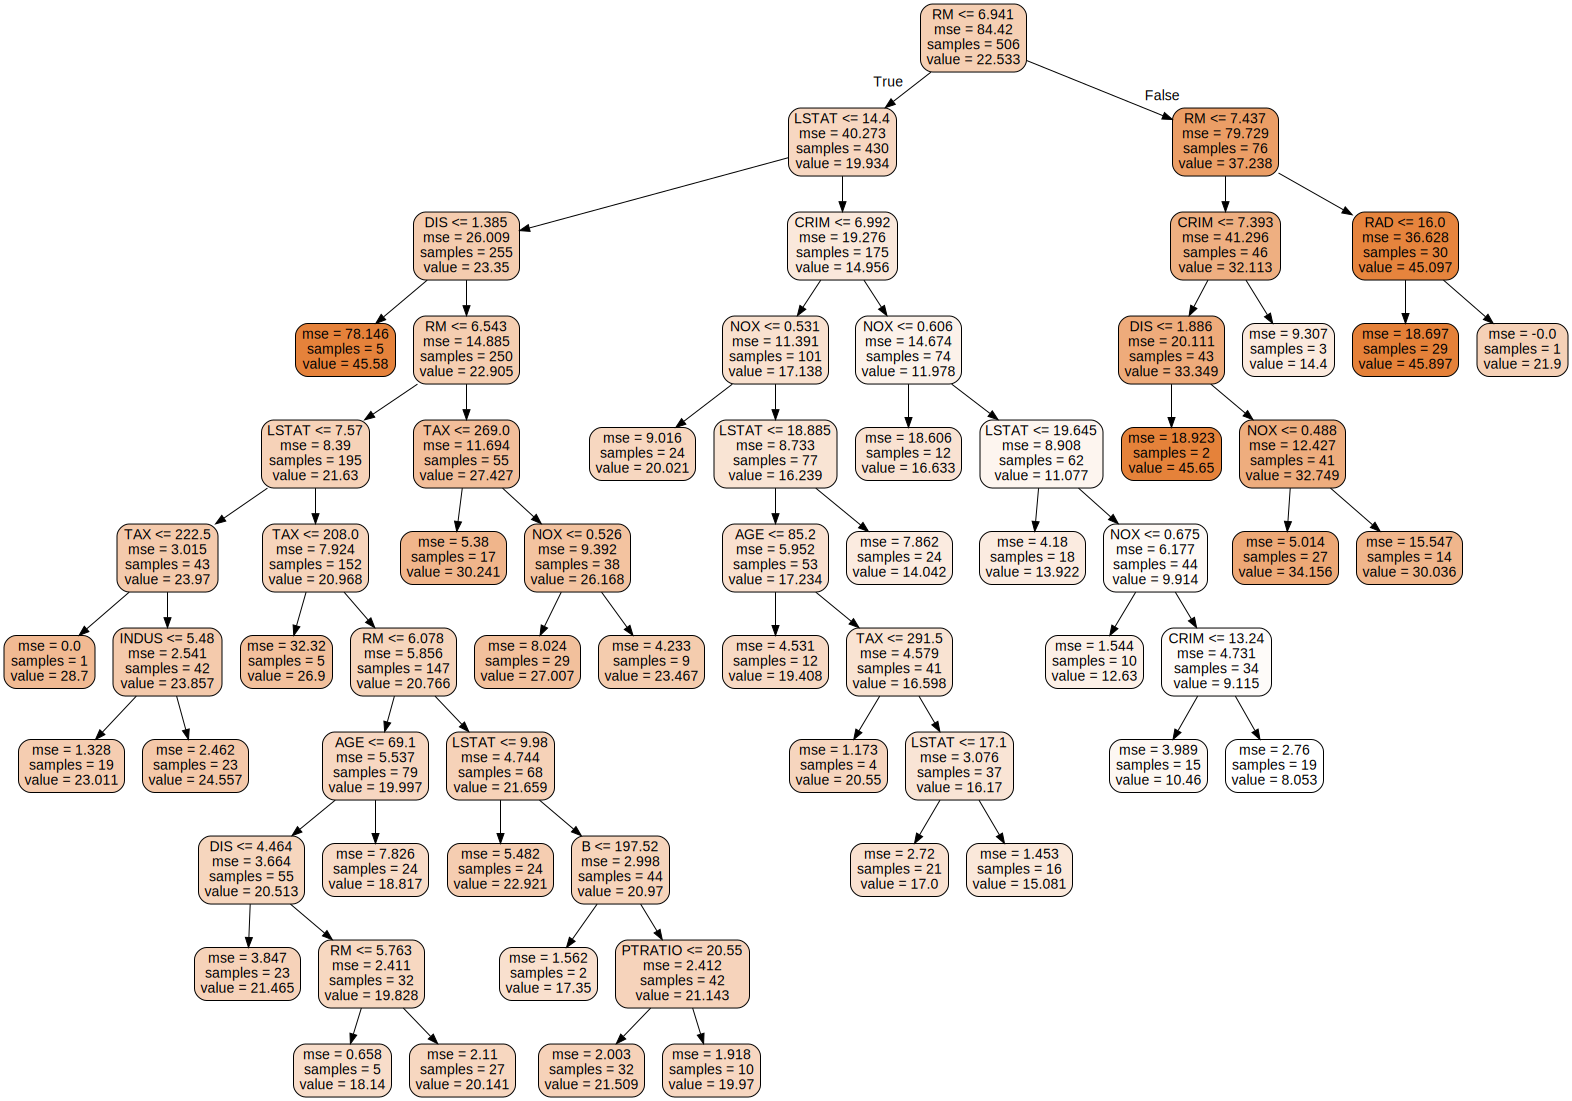

In [40]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=30)

dtr.fit(X, y)

dot_data = export_graphviz(dtr, feature_names=boston.feature_names,  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data)
graph.render("tree1") 
graph

# Evaluating Model

In [44]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = dtr.predict(X_test)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R Squared Score is:", r2_score(y_test, y_pred))

Mean Absolute Error: 1.528181415390577
Mean Squared Error: 4.2367621773277
Root Mean Squared Error: 2.058339665198069
R Squared Score is: 0.9422263246931465


In [46]:
# Importance of Features

for importance, name in sorted(zip(dtr.feature_importances_, boston.feature_names),reverse=True):
    print (name, importance)

RM 0.6107062372610191
LSTAT 0.20594691577871144
DIS 0.07324313594467594
CRIM 0.055878478033493266
NOX 0.023196964202842396
RAD 0.014187846278728296
TAX 0.011951960744173143
AGE 0.003094415868217509
B 0.0007000057934555713
INDUS 0.0006338560040381602
PTRATIO 0.00046018409064511233
ZN 0.0
CHAS 0.0
